# Criando os nomes

In [109]:
import pandas as pd

In [111]:
url_mulheres="https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f"
url_homens="https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m"


In [113]:
nomes_f = pd.read_json(url_mulheres)
nomes_m = pd.read_json(url_homens)

In [115]:
print('Quantidade de nomes: '+ str(len(nomes_f)+len(nomes_m)))

Quantidade de nomes: 400


In [117]:
frames = [nomes_f,nomes_m]
type(frames)

list

In [119]:
nomes = pd.concat(frames)['nome'].to_frame()

In [121]:
nomes.sample(5)

,nome
84,SEVERINO
0,JOSE
179,IAGO
10,SANDRA
171,TERESINHA


# Incluindo  ID e Email  dos alunos

In [123]:
import numpy as np

In [125]:
np.random.seed(123)

In [127]:
total_alunos = len(nomes)
total_alunos

400

In [129]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1

In [131]:
nomes.sample(5)

,nome,id_aluno
87,JONAS,120
135,ROSILENE,387
83,RENAN,9
57,IGOR,345
154,NICOLE,182


In [133]:
dominios = ['@dominiodoemail.com.br','@servicodoemail.com']
dominios

['@dominiodoemail.com.br', '@servicodoemail.com']

In [135]:
nomes['dominio'] = np.random.choice(dominios,total_alunos)
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@servicodoemail.com
196,ARLINDO,99,@dominiodoemail.com.br
197,MICHAEL,323,@servicodoemail.com
198,ALVARO,383,@dominiodoemail.com.br


In [137]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [139]:
nomes

,nome,id_aluno,dominio,matriculas,email
0,MARIA,235,@dominiodoemail.com.br,1,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,1,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,1,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,5,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,5,adriana@servicodoemail.com
...,...,...,...,...,...
195,WALTER,231,@servicodoemail.com,3,walter@servicodoemail.com
196,ARLINDO,99,@dominiodoemail.com.br,1,arlindo@dominiodoemail.com.br
197,MICHAEL,323,@servicodoemail.com,4,michael@servicodoemail.com
198,ALVARO,383,@dominiodoemail.com.br,5,alvaro@dominiodoemail.com.br


# Criando a tabela cursos

In [141]:
url_cursos = "http://tabela-cursos.herokuapp.com/index.html"
url_cursos

'http://tabela-cursos.herokuapp.com/index.html'

In [143]:
import html5lib
cursos = pd.read_html(url_cursos)
type(cursos)

list

In [145]:
cursos = cursos[0]

In [147]:
type(cursos)

pandas.core.frame.DataFrame

In [149]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


# Index de cursos

In [151]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'},inplace=True)

In [153]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [155]:
cursos['id'] = cursos.index+1

In [157]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [159]:
cursos.set_index('id',inplace=True)

In [161]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [163]:
url_igpm = "http://www.idealsoftwares.com.br/indices/igp_m.html"

In [165]:
pd.read_html(url_igpm,decimal=',',thousands='.')[0]

2020                                                             
          MÊS Mensal % Acumulado nos últimos 12 meses % Acumulado no ano %
0     Janeiro     0.48                           7.8223             0.4800
1   Fevereiro    -0.04                           6.8389             0.4398
2       Março     1.24                           6.8178             1.6853
3       Abril     0.80                           6.6908             2.4987
4        Maio     0.28                           6.5103             2.7857
5       Junho     1.56                           7.3133             4.3892
6       Julho     2.23                           9.2693             6.7171
7      Agosto     2.74                          13.0205             9.6411
8    Setembro      NaN                              NaN                NaN
9     Outubro      NaN                              NaN                NaN
10   Novembro      NaN                              NaN                NaN
11   Dezembro      NaN                              NaN                NaN

In [167]:
np.random.permutation(5)+1

array([3, 2, 4, 5, 1])

In [169]:

nomes.sample(5)

,nome,id_aluno,dominio,matriculas,email
142,HUGO,378,@dominiodoemail.com.br,8,hugo@dominiodoemail.com.br
150,EDMILSON,326,@dominiodoemail.com.br,1,edmilson@dominiodoemail.com.br
161,DAMIAO,349,@servicodoemail.com,2,damiao@servicodoemail.com
163,REGIANE,308,@dominiodoemail.com.br,1,regiane@dominiodoemail.com.br
87,JONAS,120,@dominiodoemail.com.br,3,jonas@dominiodoemail.com.br


# Matriculando os alunos nos cursos

In [171]:
nomes.sample(5)

,nome,id_aluno,dominio,matriculas,email
169,WELLINGTON,40,@servicodoemail.com,3,wellington@servicodoemail.com
185,JONATAN,127,@servicodoemail.com,4,jonatan@servicodoemail.com
170,ALEXANDRO,341,@servicodoemail.com,1,alexandro@servicodoemail.com
151,SEVERINA,5,@servicodoemail.com,2,severina@servicodoemail.com
69,REGINALDO,170,@dominiodoemail.com.br,1,reginaldo@dominiodoemail.com.br


In [173]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=nomes.shape[0])*1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,matriculas,email
18,RAIMUNDO,70,@dominiodoemail.com.br,1,raimundo@dominiodoemail.com.br
109,GEOVANA,300,@dominiodoemail.com.br,2,geovana@dominiodoemail.com.br
140,NEUZA,23,@dominiodoemail.com.br,2,neuza@dominiodoemail.com.br
81,MICHELE,253,@servicodoemail.com,2,michele@servicodoemail.com
24,CLAUDIA,16,@dominiodoemail.com.br,1,claudia@dominiodoemail.com.br


In [175]:
nomes.matriculas.describe()

count    400.000000
mean       2.152500
std        1.568565
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [177]:
import seaborn as sns
type(nomes.matriculas)

pandas.core.series.Series

<AxesSubplot:xlabel='matriculas', ylabel='Density'>

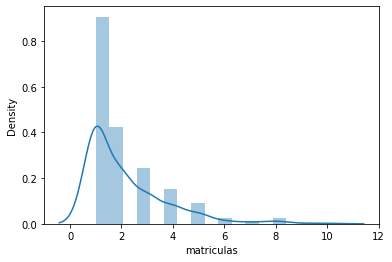

In [179]:
sns.distplot(nomes.matriculas)

In [181]:
nomes.matriculas.value_counts()

1     192
2      90
3      52
4      32
5      19
8       5
6       5
7       3
10      1
9       1
Name: matriculas, dtype: int64

In [183]:
nomes.sample(5)

,nome,id_aluno,dominio,matriculas,email
41,DANIELA,296,@dominiodoemail.com.br,1,daniela@dominiodoemail.com.br
123,IVONE,289,@dominiodoemail.com.br,2,ivone@dominiodoemail.com.br
115,MILTON,104,@servicodoemail.com,4,milton@servicodoemail.com
141,ORLANDO,159,@dominiodoemail.com.br,2,orlando@dominiodoemail.com.br
120,JOSIANE,178,@dominiodoemail.com.br,1,josiane@dominiodoemail.com.br


# Selecionando cursos

In [185]:
nomes.head(30)

,nome,id_aluno,dominio,matriculas,email
0,MARIA,235,@dominiodoemail.com.br,2,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,3,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,1,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,1,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,2,adriana@servicodoemail.com
5,JULIANA,310,@dominiodoemail.com.br,1,juliana@dominiodoemail.com.br
6,MARCIA,55,@servicodoemail.com,2,marcia@servicodoemail.com
7,FERNANDA,288,@dominiodoemail.com.br,1,fernanda@dominiodoemail.com.br
8,PATRICIA,379,@servicodoemail.com,1,patricia@servicodoemail.com
9,ALINE,92,@servicodoemail.com,2,aline@servicodoemail.com


In [187]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)
prob



array([0.03661108, 0.04922543, 0.06928015, 0.05210455, 0.08613311,
       0.07554979, 0.08595685, 0.00198048, 0.00239778, 0.0804038 ,
       0.08371444, 0.06176894, 0.01176501, 0.00159626, 0.0540163 ,
       0.04431806, 0.03052308, 0.07995562, 0.02736688, 0.06533238])

In [189]:
for index,row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id,np.random.choice(cursos.index,p=prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas,columns = ['id_aluno','id_curso'])
matriculas

,id_aluno,id_curso
0,235,4
1,235,5
2,43,6
3,43,7
4,43,10
...,...,...
856,231,15
857,99,18
858,323,12
859,383,10


In [191]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,31,Lógica de programação
2,43,Java para Web
3,66,C# para Web
4,39,Ruby on Rails
5,73,Cursos de Python
6,66,PHP com MySql
7,77,.NET para web
8,2,Novas integrações com Java
9,1,TDD com Java


In [193]:



igpm = pd.read_html('http://www.idealsoftwares.com.br/indices/igp_m.html',decimal=',',thousands='.')[0]

In [195]:
igpm

2020                                                             
          MÊS Mensal % Acumulado nos últimos 12 meses % Acumulado no ano %
0     Janeiro     0.48                           7.8223             0.4800
1   Fevereiro    -0.04                           6.8389             0.4398
2       Março     1.24                           6.8178             1.6853
3       Abril     0.80                           6.6908             2.4987
4        Maio     0.28                           6.5103             2.7857
5       Junho     1.56                           7.3133             4.3892
6       Julho     2.23                           9.2693             6.7171
7      Agosto     2.74                          13.0205             9.6411
8    Setembro      NaN                              NaN                NaN
9     Outubro      NaN                              NaN                NaN
10   Novembro      NaN                              NaN                NaN
11   Dezembro      NaN                              NaN                NaN

In [197]:
igpm.rename(columns={'Mensal %' :'Mensal'},inplace=True)

In [199]:
igpm

2020                                                           
          MÊS Mensal Acumulado nos últimos 12 meses % Acumulado no ano %
0     Janeiro   0.48                           7.8223             0.4800
1   Fevereiro  -0.04                           6.8389             0.4398
2       Março   1.24                           6.8178             1.6853
3       Abril   0.80                           6.6908             2.4987
4        Maio   0.28                           6.5103             2.7857
5       Junho   1.56                           7.3133             4.3892
6       Julho   2.23                           9.2693             6.7171
7      Agosto   2.74                          13.0205             9.6411
8    Setembro    NaN                              NaN                NaN
9     Outubro    NaN                              NaN                NaN
10   Novembro    NaN                              NaN                NaN
11   Dezembro    NaN                              NaN                NaN

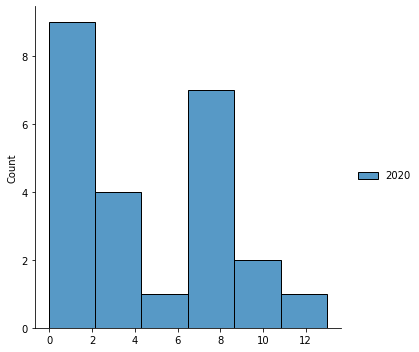

In [201]:
sns.displot(igpm)

In [203]:
nomes.sample(3)

,nome,id_aluno,dominio,matriculas,email
40,SERGIO,139,@dominiodoemail.com.br,2,sergio@dominiodoemail.com.br
161,RAIANE,247,@dominiodoemail.com.br,3,raiane@dominiodoemail.com.br
67,HENRIQUE,64,@dominiodoemail.com.br,3,henrique@dominiodoemail.com.br


In [205]:
cursos.sample(3)

,nome_do_curso
id,
8,Novas integrações com Java
18,Programação funcional
17,Internet das coisas


In [207]:
matriculas.sample(5)


,id_aluno,id_curso
793,177,2
745,315,10
769,351,1
258,106,17
737,378,1


In [209]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,31,Lógica de programação
2,43,Java para Web
3,66,C# para Web
4,39,Ruby on Rails
5,73,Cursos de Python
6,66,PHP com MySql
7,77,.NET para web
8,2,Novas integrações com Java
9,1,TDD com Java


# saida em diferentes formatos

In [211]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,31,Lógica de programação
2,43,Java para Web
3,66,C# para Web


In [213]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv',index=False)

In [215]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,31,Lógica de programação
1,43,Java para Web
2,66,C# para Web
3,39,Ruby on Rails
4,73,Cursos de Python
5,66,PHP com MySql
6,77,.NET para web
7,2,Novas integrações com Java
8,1,TDD com Java
9,57,Código limpo com C#


In [217]:
matriculas_json = matriculas_por_curso.to_json()

In [219]:
matriculas_json

'{"quantidade_de_alunos":{"1":31,"2":43,"3":66,"4":39,"5":73,"6":66,"7":77,"8":2,"9":1,"10":57,"11":70,"12":59,"13":14,"14":2,"15":53,"16":32,"17":24,"18":65,"19":34,"20":53},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [221]:
matriculas_html = matriculas_por_curso.to_html()

In [222]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>31</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>43</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>66</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>39</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>73</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>66</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>77</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>2</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1</td>
  

# Criando o banco sqlite

In [223]:
!pip install sqlalchemy

In [224]:
from sqlalchemy import create_engine,MetaData,Table


In [225]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [226]:
type(engine)

sqlalchemy.engine.base.Engine

In [227]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,31,Lógica de programação
2,43,Java para Web
3,66,C# para Web


In [228]:
matriculas_por_curso.to_sql("matriculas",engine)

In [229]:
print(engine.table_names())

['matriculas']


# Buscando do banco sql

In [230]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [231]:
pd.read_sql(query,engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,8,2,Novas integrações com Java
1,9,1,TDD com Java
2,13,14,Persistência com .NET
3,14,2,Desenvolvendo jogos


In [232]:
pd.read_sql_table('matriculas',engine,columns=['nome_do_curso','quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,31
1,Java para Web,43
2,C# para Web,66
3,Ruby on Rails,39
4,Cursos de Python,73
5,PHP com MySql,66
6,.NET para web,77
7,Novas integrações com Java,2
8,TDD com Java,1
9,Código limpo com C#,57


In [233]:
muitas_matriculas = pd.read_sql_table('matriculas',engine,columns=['nome_do_curso','quantidade_de_alunos'])

In [234]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos>70')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
4,Cursos de Python,73
6,.NET para web,77


# Escrevendo no banco

In [235]:
muitras_matriculas.to_sql('muitas_matriculas',con = engine)

In [236]:
engine.table_names()

['matriculas', 'muitas_matriculas']

# nomes dos alunos e alunas da próxima turma

In [237]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,31,Lógica de programação
2,43,Java para Web
3,66,C# para Web
4,39,Ruby on Rails
5,73,Cursos de Python
6,66,PHP com MySql
7,77,.NET para web
8,2,Novas integrações com Java
9,1,TDD com Java


In [238]:
matriculas

,id_aluno,id_curso
0,235,4
1,235,5
2,43,6
3,43,7
4,43,10
...,...,...
856,231,15
857,99,18
858,323,12
859,383,10


In [239]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [240]:
matriculas[matriculas.id_curso==16]

,id_aluno,id_curso
49,242,16
72,297,16
96,249,16
100,27,16
104,27,16
120,14,16
132,60,16
154,53,16
175,253,16
199,292,16


In [241]:
id_curso = 16
proxima_turma = matriculas.query(f"id_curso=={id_curso}")
proxima_turma

,id_aluno,id_curso
49,242,16
72,297,16
96,249,16
100,27,16
104,27,16
120,14,16
132,60,16
154,53,16
175,253,16
199,292,16


In [245]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
2           CESAR
14          SUELI
27        RAFAELA
27        RAFAELA
39         DENISE
51         MANUEL
53        JANAINA
60         FLAVIA
82           IARA
110       OSVALDO
123         EDSON
123         EDSON
146      LUCILENE
171        ROSELI
211         TANIA
211         TANIA
215        WESLEI
229        NAIARA
236      LEONARDO
242         SONIA
249        ANGELA
250    ELIZANGELA
253       MICHELE
260       VICENTE
292        ANDREA
297          ROSA
301        MAIARA
330         JORGE
348        DANILO
362       NIVALDO
394        JOELMA
398      CRISTIAN
Name: nome, dtype: object

In [246]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
2,CESAR
14,SUELI
27,RAFAELA
27,RAFAELA
39,DENISE
51,MANUEL
53,JANAINA
60,FLAVIA
82,IARA


In [249]:
nome_curso = cursos.loc[id_curso]

In [250]:
nome_curso = nome_curso['nome_do_curso']
nome_curso

'Estatística básica'

In [251]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
2,CESAR
14,SUELI
27,RAFAELA
27,RAFAELA
39,DENISE
51,MANUEL
53,JANAINA
60,FLAVIA
82,IARA


In [254]:
proxima_turma = proxima_turma.rename(columns={'nome':f'Alunos do curso de: {nome_curso}'})

In [255]:
proxima_turma.sample(3)

,Alunos do curso de: Estatística básica
id_aluno,
171,ROSELI
14,SUELI
229,NAIARA


# Excel

In [258]:
proxima_turma.to_excel('proxima_turma.xlsx',index=False)

In [257]:
!pip install openpyxl

  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8919 sha256=8224c043863cff11ea9f757acdceb4b93d491638747723f5a72335027a90e754
  Stored in directory: c:\users\igors\appdata\local\pip\cache\wheels\6e\df\38\abda47b884e3e25f9f9b6430e5ce44c47670758a50c0c51759
Successfully built et-xmlfile


In [261]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de: Estatística básica
0,CESAR
1,SUELI
2,RAFAELA
3,RAFAELA
4,DENISE
5,MANUEL
6,JANAINA
7,FLAVIA
8,IARA
9,OSVALDO
